In [ ]:
# Loading and Installing Required Libraries
install.packages("pander")
install.packages("car")
install.packages("caret")
install.packages("purrr")
install.packages("e1071")
install.packages("class")
install.packages("MASS")
library(tidyverse)
library(pander)
library(car)
library(caret)
library(purrr)
library(e1071)
library(class)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching p

In [ ]:
# Reading the dataset file
data <- read.csv("diabetes_012_health_indicators_BRFSS2015.csv", sep = ",")
data <- as.data.frame(data)

In [ ]:
# Printing top 6 rows
head(data)

Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8


In [ ]:
dim(data)

[1] 253680     22

In [ ]:
summary(data)

  Diabetes_012        HighBP         HighChol        CholCheck     
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :0.0000   Median :0.000   Median :0.0000   Median :1.0000  
 Mean   :0.2969   Mean   :0.429   Mean   :0.4241   Mean   :0.9627  
 3rd Qu.:0.0000   3rd Qu.:1.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :2.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
      BMI            Smoker           Stroke        HeartDiseaseorAttack
 Min.   :12.00   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000     
 1st Qu.:24.00   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.00000     
 Median :27.00   Median :0.0000   Median :0.00000   Median :0.00000     
 Mean   :28.38   Mean   :0.4432   Mean   :0.04057   Mean   :0.09419     
 3rd Qu.:31.00   3rd Qu.:1.0000   3rd Qu.:0.00000   3rd Qu.:0.00000     
 Max.   :98.00   Max.   :1.0000   Max.   :1.00000   Max.   :1.00000     
  PhysActivit

In [ ]:
# Getting glimpse of data
str(data)

'data.frame':	222267 obs. of  22 variables:
 $ Diabetes_012        : num  0 0 0 0 0 0 0 0 2 0 ...
 $ HighBP              : num  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : num  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : num  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : num  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : num  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : num  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : num  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : num  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : num  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : num  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [ ]:
# Checking for null values in each column
colSums(is.na(data))

Diabetes_012               HighBP             HighChol 
                   0                    0                    0 
           CholCheck                  BMI               Smoker 
                   0                    0                    0 
              Stroke HeartDiseaseorAttack         PhysActivity 
                   0                    0                    0 
              Fruits              Veggies    HvyAlcoholConsump 
                   0                    0                    0 
       AnyHealthcare          NoDocbcCost              GenHlth 
                   0                    0                    0 
            MentHlth             PhysHlth             DiffWalk 
                   0                    0                    0 
                 Sex                  Age            Education 
                   0                    0                    0 
              Income 
                   0

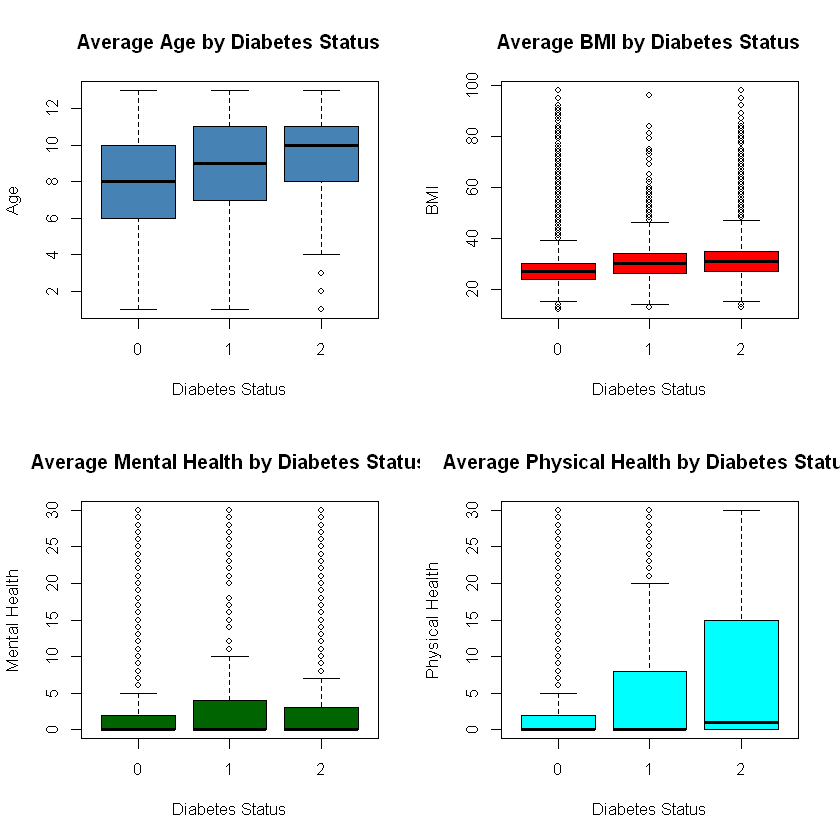

In [ ]:
# Identifying and plotting relationship between age, BMI, mental health, physical health and Diabetes_012
par(mfrow=c(2,2))
boxplot(data$Age ~ data$Diabetes_012, 
main = "Average Age by Diabetes Status",
xlab = "Diabetes Status",
ylab = "Age",
col = "steel blue")
boxplot(data$BMI ~ data$Diabetes_012, 
main = "Average BMI by Diabetes Status",
xlab = "Diabetes Status",
ylab = "BMI",
col = "red")
boxplot(data$MentHlth ~ data$Diabetes_012, 
main = "Average Mental Health by Diabetes Status",
xlab = "Diabetes Status",
ylab = "Mental Health",
col = "dark green")
boxplot(data$PhysHlth ~ data$Diabetes_012, 
main = "Average Physical Health by Diabetes Status",
xlab = "Diabetes Status",
ylab = "Physical Health",
col = "cyan")

In [ ]:
# Split data into training and testing sets. A split of 70% and 30% is used
set.seed(1)
data <- na.omit(data)
split1<- sample(c(rep(0, 0.7 * nrow(data)), rep(1, 0.3 * nrow(data))))
train <- data[split1 == 0, ] 
test <- data[split1== 1, ]

In [ ]:
# Train KNN classifier
classifier_knn <- knn(train = train,
                      test = test,
                      cl = train$Diabetes_012,
                      k = 2)

In [ ]:
# Perform prediction and print prediction results. The accracy is 96%
cm <- table(test$Diabetes_012, classifier_knn)
# Model Evaluation
confusionMatrix(cm)

Confusion Matrix and Statistics

   classifier_knn
        0     1     2
  0 55784   195   243
  1   916    57   195
  2   710   228  8351

Overall Statistics
                                          
               Accuracy : 0.9627          
                 95% CI : (0.9612, 0.9641)
    No Information Rate : 0.861           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.854           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0  Class: 1 Class: 2
Sensitivity            0.9717 0.1187500   0.9502
Specificity            0.9527 0.9832173   0.9838
Pos Pred Value         0.9922 0.0488014   0.8990
Neg Pred Value         0.8445 0.9935431   0.9924
Prevalence             0.8610 0.0071987   0.1318
Detection Rate         0.8366 0.0008548   0.1252
Detection Prevalence   0.8432 0.0175168   0.1393
Balanced Accuracy      0.9622 0.5509836

In [ ]:
# Build a naive bayes classifier
classifier_cl <- naiveBayes(Diabetes_012 ~ ., data = train)
y_pred <- predict(classifier_cl, newdata = test)

In [ ]:
# Confusion Matrix
cm <- table(test$Diabetes_012, y_pred)
# Model Evaluation. The accuracy is 76% approximately.
confusionMatrix(cm)

Confusion Matrix and Statistics

   y_pred
        0     1     2
  0 45201   443 10578
  1   645    21   502
  2  3867   103  5319

Overall Statistics
                                          
               Accuracy : 0.758           
                 95% CI : (0.7547, 0.7612)
    No Information Rate : 0.7456          
    P-Value [Acc > NIR] : 6.947e-14       
                                          
                  Kappa : 0.2817          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0  Class: 1 Class: 2
Sensitivity            0.9092 0.0370370  0.32435
Specificity            0.3504 0.9826507  0.92104
Pos Pred Value         0.8040 0.0179795  0.57261
Neg Pred Value         0.5685 0.9916655  0.80694
Prevalence             0.7456 0.0085034  0.24594
Detection Rate         0.6779 0.0003149  0.07977
Detection Prevalence   0.8432 0.0175168  0.13931
Balanced Accuracy      0.6298 0.5098438  0.6227

In [ ]:
#install.packages("ISLR")
#install.packages("rpart")
#install.packages("caTools")
install.packages("party")
install.packages("magrittr")
library(ISLR) #contains Hitters dataset
library(rpart) #for fitting decision trees
library(caTools)
library(magrittr)
library(party)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4


Attaching package: ‘modeltools’


The following object is masked from ‘package:car’:

    Predict


Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following obj

In [ ]:
train$Diabetes_012 <- as.factor(train$Diabetes_012)
test$Diabetes_012 <- as.factor(test$Diabetes_012)
tree <- ctree(Diabetes_012 ~ ., data = train)

In [ ]:
y_pred <- predict(tree, newdata = test)

[1] 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0
  [109] 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
  [145] 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
  [361] 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0
  [433] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 0 2
  [469] 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
  [649] 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 [1045] 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0
 [1153] 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 [1369] 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [ ]:
# Confusion Matrix
cm <- table(as.factor(test$Diabetes_012), y_pred)
cm
# Model Evaluation.
confusionMatrix(cm)

   y_pred
        0     1     2
  0 55296     0   926
  1  1086     0    82
  2  8064     0  1225

Confusion Matrix and Statistics

   y_pred
        0     1     2
  0 55296     0   926
  1  1086     0    82
  2  8064     0  1225

Overall Statistics
                                          
               Accuracy : 0.8477          
                 95% CI : (0.8449, 0.8504)
    No Information Rate : 0.9665          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1555          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.8580       NA  0.54859
Specificity            0.5853  0.98248  0.87487
Pos Pred Value         0.9835       NA  0.13188
Neg Pred Value         0.1250       NA  0.98244
Prevalence             0.9665  0.00000  0.03349
Detection Rate         0.8293  0.00000  0.01837
Detection Prevalence   0.8432  0.01752  0.13931
Balanced Accuracy      0.7217       NA  0.71173